# **Classifying newswires: A multiclass classification example**

**The Reuters Dataset**

In [6]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import imdb
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

In [7]:
# Loading the Reuters dataset

from tensorflow.keras.datasets import reuters

# num_words=10000 restricts the data to the 10,000 most frequently occurring words found in the data
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [8]:
len(train_data), len(test_data)

(8982, 2246)

In [9]:
train_data[0][:10]

[1, 2, 2, 8, 43, 10, 447, 5, 25, 207]

**Prepare the data**

In [10]:
# Encoding the integer sequences via multi-hot encoding
def vectorize_sequences(sequences, dimension=10000):

  # creates an all-zero matrix of shape (len(sequences), dimension)
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    for j in sequence:

      # sets specific indices of results[i] to 1s
      results[i, j] = 1.
    return results

In [11]:
# Encoding the input data
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [12]:
# Encoding the labels
def to_one_hot(labels, dimension=46):
  results = np.zeros((len(labels), dimension))
  for i, label in enumerate(labels):
    results[i, label] = 1.
  return results

In [13]:
y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)

In [14]:
# built-in way to do this in Keras
# y_train = to_categorical(train_labels)
# y_test = to_categorical(test_labels)

**Build the model**

About this architecture:
*   The first and second layers Start with 64 units using ***relu*** activation
*   End the model with a Dense layer of size 46 using ***softmax*** activation

The model will output a probability distribution over the 46 different
output classes.

Using ***categorical_crossentropy*** measures
the distance between two probability distributions.



In [15]:
# Model definition

# the number of output classes has 46

model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])

In [16]:
# Compiling the model

model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

**Validating approach**

In [17]:
# Setting aside a validation set
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

In [18]:
# Training the model
# Train the model for 20 epochs.
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 3s 39ms/step - loss: 3.8120 - accuracy: 0.1384 - val_loss: 3.7980 - val_accuracy: 0.0590
Epoch 2/20
16/16 [==============================] - 0s 17ms/step - loss: 3.7883 - accuracy: 0.1941 - val_loss: 3.7771 - val_accuracy: 0.2230
Epoch 3/20
16/16 [==============================] - 0s 20ms/step - loss: 3.7678 - accuracy: 0.2164 - val_loss: 3.7570 - val_accuracy: 0.2230
Epoch 4/20
16/16 [==============================] - 0s 18ms/step - loss: 3.7478 - accuracy: 0.2164 - val_loss: 3.7373 - val_accuracy: 0.2230
Epoch 5/20
16/16 [==============================] - 0s 16ms/step - loss: 3.7282 - accuracy: 0.2164 - val_loss: 3.7178 - val_accuracy: 0.2230
Epoch 6/20
16/16 [==============================] - 0s 18ms/step - loss: 3.7086 - accuracy: 0.2164 - val_loss: 3.6983 - val_accuracy: 0.2230
Epoch 7/20
16/16 [==============================] - 0s 21ms/step - loss: 3.6891 - accuracy: 0.2164 - val_loss: 3.6790 - val_accuracy: 0.2230
Epoch 8/20
16

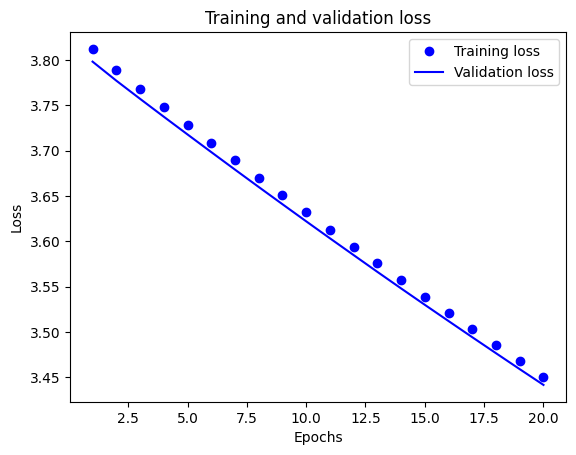

In [19]:
# Plotting the training and validation loss
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

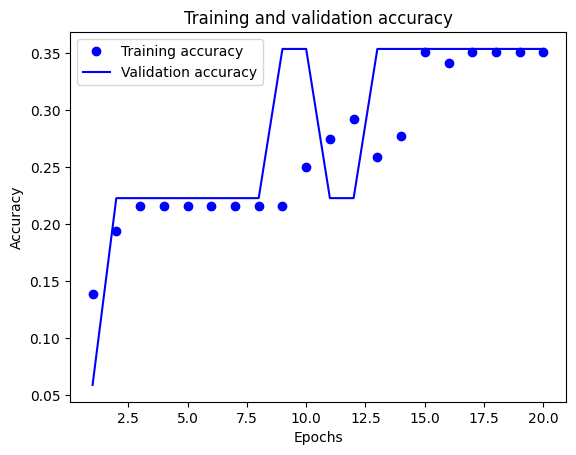

In [20]:
# Plotting the training and validation accuracy
plt.clf() # Clears the figure
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

**Retraining a model from scratch**

In [21]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])

In [22]:
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

In [23]:
model.fit(x_train, y_train, epochs=9, batch_size=512)

Epoch 1/9
18/18 [==============================] - 1s 15ms/step - loss: 3.7950 - accuracy: 0.2786
Epoch 2/9
18/18 [==============================] - 0s 14ms/step - loss: 3.6846 - accuracy: 0.3517
Epoch 3/9
18/18 [==============================] - 0s 13ms/step - loss: 3.5004 - accuracy: 0.3517
Epoch 4/9
18/18 [==============================] - 0s 14ms/step - loss: 3.2392 - accuracy: 0.3517
Epoch 5/9
18/18 [==============================] - 0s 15ms/step - loss: 2.9393 - accuracy: 0.3517
Epoch 6/9
18/18 [==============================] - 0s 14ms/step - loss: 2.6649 - accuracy: 0.3517
Epoch 7/9
18/18 [==============================] - 0s 14ms/step - loss: 2.4897 - accuracy: 0.3517
Epoch 8/9
18/18 [==============================] - 0s 14ms/step - loss: 2.4273 - accuracy: 0.3517
Epoch 9/9
18/18 [==============================] - 0s 13ms/step - loss: 2.4139 - accuracy: 0.3517


In [24]:
results = model.evaluate(x_test, y_test)

71/71 [==============================] - 0s 4ms/step - loss: 2.4235 - accuracy: 0.3620


In [25]:
results

[2.423456907272339, 0.36197686195373535]

**Generating predictions on new data**

In [26]:
predictions = model.predict(x_test)

71/71 [==============================] - 0s 3ms/step


In [27]:
# Each entry in “predictions” is a vector of length 46
predictions[0].shape

(46,)

In [28]:
# The coefficients in this vector sum to 1, as they form a probability distribution
np.sum(predictions[0])

0.9999999

In [29]:
# The largest entry is the predicted class—the class with the highest probability
np.argmax(predictions[0])

3

**Expand layers for Experiments**

In [30]:
# Model definition
# Add three intermediate layers with one 128 units and two 64 units
# the number of output classes has 46

model = keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])

In [31]:
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

In [32]:
# Training the model
# Train the model for 20 epochs.
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 2s 37ms/step - loss: 3.8117 - accuracy: 0.1711 - val_loss: 3.7977 - val_accuracy: 0.0440
Epoch 2/20
16/16 [==============================] - 0s 20ms/step - loss: 3.7879 - accuracy: 0.2538 - val_loss: 3.7768 - val_accuracy: 0.3530
Epoch 3/20
16/16 [==============================] - 0s 17ms/step - loss: 3.7675 - accuracy: 0.3514 - val_loss: 3.7569 - val_accuracy: 0.3530
Epoch 4/20
16/16 [==============================] - 0s 18ms/step - loss: 3.7476 - accuracy: 0.3514 - val_loss: 3.7371 - val_accuracy: 0.3530
Epoch 5/20
16/16 [==============================] - 0s 18ms/step - loss: 3.7279 - accuracy: 0.3514 - val_loss: 3.7176 - val_accuracy: 0.3530
Epoch 6/20
16/16 [==============================] - 0s 22ms/step - loss: 3.7083 - accuracy: 0.3514 - val_loss: 3.6981 - val_accuracy: 0.3540
Epoch 7/20
16/16 [==============================] - 0s 17ms/step - loss: 3.6889 - accuracy: 0.3514 - val_loss: 3.6788 - val_accuracy: 0.3540
Epoch 8/20
16

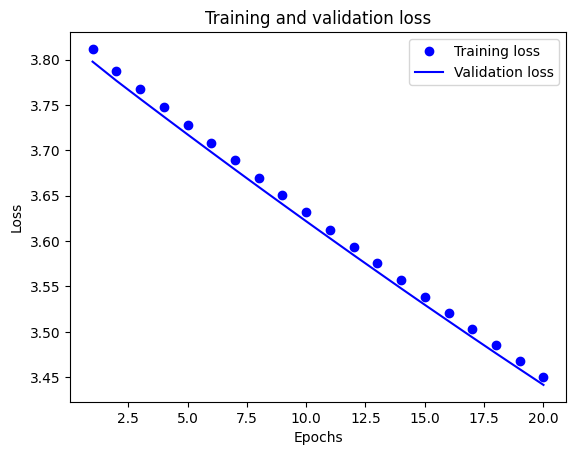

In [33]:
# Plotting the training and validation loss
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

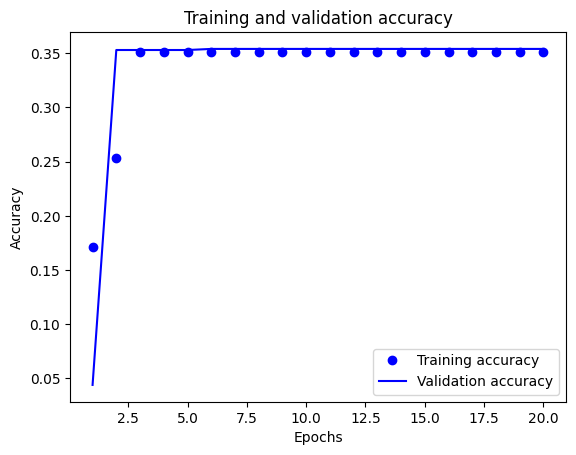

In [34]:
# Plotting the training and validation accuracy
plt.clf() # Clears the figure
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

**Retrain model for further experiment**

In [35]:
# Training the model
# Train the model for 20 epochs.
history_retrain = model.fit(x_train,
                            y_train,
                            epochs=20,
                            batch_size=512)

Epoch 1/20
18/18 [==============================] - 0s 15ms/step - loss: 3.4146 - accuracy: 0.3517
Epoch 2/20
18/18 [==============================] - 0s 14ms/step - loss: 3.1863 - accuracy: 0.3517
Epoch 3/20
18/18 [==============================] - 0s 15ms/step - loss: 2.6996 - accuracy: 0.3517
Epoch 4/20
18/18 [==============================] - 0s 15ms/step - loss: 2.4568 - accuracy: 0.3517
Epoch 5/20
18/18 [==============================] - 0s 14ms/step - loss: 2.4218 - accuracy: 0.3517
Epoch 6/20
18/18 [==============================] - 0s 14ms/step - loss: 2.4106 - accuracy: 0.3517
Epoch 7/20
18/18 [==============================] - 0s 14ms/step - loss: 2.4064 - accuracy: 0.3517
Epoch 8/20
18/18 [==============================] - 0s 15ms/step - loss: 2.4044 - accuracy: 0.3517
Epoch 9/20
18/18 [==============================] - 0s 14ms/step - loss: 2.4044 - accuracy: 0.3517
Epoch 10/20
18/18 [==============================] - 0s 14ms/step - loss: 2.4046 - accuracy: 0.3517
Epoch 11/

In [36]:
results_retrain = model.evaluate(x_test, y_test)

71/71 [==============================] - 0s 4ms/step - loss: 2.4176 - accuracy: 0.3620


In [37]:
results_retrain

[2.4176344871520996, 0.36197686195373535]

In [40]:
history_retrain.history

{'loss': [3.414619207382202,
  3.1862568855285645,
  2.6996448040008545,
  2.456826686859131,
  2.4217746257781982,
  2.4106476306915283,
  2.4064290523529053,
  2.4043962955474854,
  2.404444932937622,
  2.404618740081787,
  2.4038708209991455,
  2.403693675994873,
  2.4034526348114014,
  2.403994083404541,
  2.4040162563323975,
  2.4040372371673584,
  2.403639078140259,
  2.4041073322296143,
  2.4033002853393555,
  2.403597116470337],
 'accuracy': [0.351703405380249,
  0.351703405380249,
  0.351703405380249,
  0.351703405380249,
  0.351703405380249,
  0.351703405380249,
  0.351703405380249,
  0.351703405380249,
  0.351703405380249,
  0.351703405380249,
  0.351703405380249,
  0.351703405380249,
  0.351703405380249,
  0.351703405380249,
  0.351703405380249,
  0.351703405380249,
  0.351703405380249,
  0.351703405380249,
  0.351703405380249,
  0.351703405380249]}